In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import zipfile

zip_ref=zipfile.ZipFile("/content/drive/MyDrive/mask.zip")
zip_ref.extractall()
zip_ref.close()

In [5]:
#!ls mask/train/with_mask/

In [6]:
import os
n=len(os.listdir("mask/train/without_mask/"))
n

3828

In [7]:
import pathlib
import numpy as np
data_dir=pathlib.Path("mask/train")
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names
a=len(class_names)
a

2

In [8]:
with_mask_files = os.listdir('/content/data/with_mask')
without_mask_files = os.listdir('/content/data/without_mask')

In [9]:
m=len(with_mask_files)
n=len(without_mask_files)

In [ ]:
with_mask_labels=[[0,1]]*m
without_mask_lebels=[[1,0]]*n
labels=with_mask_labels+without_mask_lebels
len(labels)
print(labels)

In [23]:
import PIL
from PIL import Image

with_mask_path='mask/train/with_mask/'
data=[]

for img_file in with_mask_files:
  image=Image.open(with_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)
len(data)
without_mask_path='mask/train/without_mask/'
for img_file in without_mask_files:
  image=Image.open(without_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)
len(data)

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


7553

In [12]:
type(data[0])

numpy.ndarray

In [24]:
x=np.array(data)
y=np.array(labels)

In [25]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)
x_train=x_train/255.
x_test=x_test/255.

In [26]:
import tensorflow as tf
from tensorflow import keras
model_1=tf.keras.models.Sequential()

model_1.add(tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model_1.add(keras.layers.MaxPool2D(pool_size=(2,2),padding="valid"))

model_1.add(tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model_1.add(keras.layers.MaxPool2D(pool_size=(2,2),padding="valid"))

model_1.add(keras.layers.Flatten())
model_1.add(keras.layers.Dense(128, activation='relu'))
model_1.add(keras.layers.Dropout(0.5))



model_1.add(keras.layers.Dense(a,activation='sigmoid'))


In [27]:
model_1.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [28]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.1,random_state=0)


In [ ]:
import tensorflow as tf
import random
tf.random.set_seed(1322)
history=model_1.fit(x_train,y_train, epochs=5,steps_per_epoch=len(x_train),
                    validation_data=(x_val,y_val),validation_steps=len(x_val))

#history=model_1.fit(x_train,y_train,validation_split=0.1,shuffle=False,epochs=10)

import matplotlib.pyplot as plt


h = history

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [30]:
loss,acc=model_1.evaluate(x_test,y_test)


48/48 [==============================] - 7s 144ms/step - loss: 0.3171 - accuracy: 0.9014


In [ ]:
model_1.summary()

Path of the image to be predicted: /content/test3.jpg


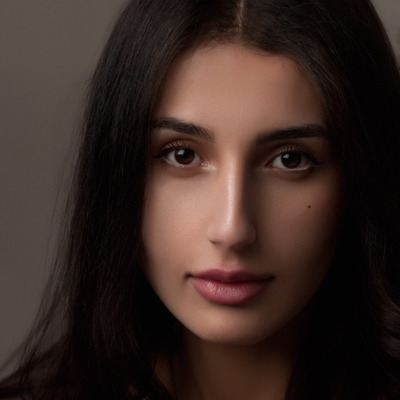

1/1 [==============================] - 0s 135ms/step
<class 'numpy.ndarray'>
[[0.92271763 0.08068412]]
0
The person in the image is not wearing a mask


In [46]:

import PIL
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

image=Image.open(input_image_path)

cv2_imshow(input_image)


image=image.convert('RGB')
image = image.resize((128,128))
image=np.array(image)
image=image/255.

image = np.reshape(image, [1,128,128,3])

l= model_1.predict(image)
print(type(l))

print(l)

input_pred_label = np.argmax([l])

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')